# 🏨 **Mission: Save the Hotel Industry with Data!**

## **Introduction**  
Alright, data scientists-in-training! You’ve just been hired as the *Chief Data Analyst* for a group of luxury hotels, and they’ve got a big problem. Guests are booking rooms, but then canceling at the last minute or simply not showing up. The result? Empty rooms, lost revenue, and very unhappy hotel managers.

Your challenge: **Can you analyze the booking data and figure out the patterns behind cancellations?** If you can predict whether a reservation will be honored or canceled, you’ll not only save the hotel chain but also impress your bosses with your data wizardry! No pressure, right?  

The dataset in your hands contains details about hotel reservations—how many nights were booked, whether car parking was requested, the price of rooms, and even special requests. Your task is to clean, analyze, and visualize this data to uncover the secrets behind cancellations. Are you ready to dive into the numbers and help the hotels keep their rooms full? Let’s get to work!  

---

## **Dataset**  
This dataset contains detailed information about hotel reservations. Each row represents a booking, and the columns describe various attributes related to the reservation. Here’s a breakdown of what you’ll find:

- **Booking_ID**: Unique identifier for each booking.  
- **no_of_adults**: Number of adults included in the booking.  
- **no_of_children**: Number of children included in the booking.  
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) booked.  
- **no_of_week_nights**: Number of weekdays (Monday to Friday) booked.  
- **type_of_meal_plan**: The meal plan selected by the customer.  
- **required_car_parking_space**: Whether the guest requested a car parking space (0 = No, 1 = Yes).  
- **room_type_reserved**: Type of room reserved, encoded for privacy.  
- **lead_time**: Number of days between booking and arrival.  
- **arrival_year**: Year of the booking arrival date.  
- **arrival_month**: Month of the booking arrival date.  
- **arrival_date**: Day of the month for the arrival date.  
- **market_segment_type**: The market segment the booking came from (e.g., online, corporate).  
- **repeated_guest**: Whether the guest is a returning customer (0 = No, 1 = Yes).  
- **no_of_previous_cancellations**: Number of previous bookings canceled by the customer.  
- **no_of_previous_bookings_not_canceled**: Number of previous bookings that were not canceled.  
- **avg_price_per_room**: Average price per day for the reservation (in euros).  
- **no_of_special_requests**: Number of special requests made by the guest (e.g., high floor, extra pillows).  
- **booking_status**: Whether the booking was honored or canceled.  

---

## **Timeline**  

Here’s your step-by-step plan for tackling this dataset. Follow it closely and make sure you show your skills at every stage:

1. **Load the dataset into a pandas DataFrame** *(17:15 - 17:20)*  
   - Load the dataset into your notebook and take a look at the first few rows.  
   - Check the data types and identify any missing values.  

2. **Introductory EDA (Exploratory Data Analysis)** *(17:20 - 17:40)*  
   - Perform an initial exploration of the dataset.  
   - Check the distribution of key variables like `avg_price_per_room`, `lead_time`, and `booking_status`.  
   - Look for patterns or outliers that could impact your analysis.  

3. **Data Treatment and Training Preparation** *(17:45 - 18:00)*  
   - Handle missing values by filling or dropping them.  
   - Encode categorical variables (e.g., `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`).  
   - Normalize or scale numerical features like `avg_price_per_room` and `lead_time` if necessary.  
   - Split the data into training and testing sets.  

4. **Baseline Model** *(18:00 - 18:15)*  
   - Create a baseline model to predict cancellations using a simple classifier (e.g., Logistic Regression, Decision Tree).  
   - This will give you a starting point for model evaluation.  

5. **Model Evaluation** *(18:15 - 18:30)*  
   - Evaluate your baseline model using appropriate metrics such as accuracy, precision, recall, and F1-score.  
   - Create confusion matrices to visualize the performance of your model.  
   - Compare the model's performance on the training and test sets to check for overfitting or underfitting.  

6. **Iterate and Improve** *(18:30 - 19:00)*  
   - Try different models (e.g., Random Forest, Gradient Boosting, or XGBoost) to improve performance.  
   - Fine-tune the hyperparameters of your models to get the best results.  
   - Visualize the performance of the models using ROC curves or AUC scores.  

7. **Final Insights and Presentation** *(19:00 - 19:15)*  
   - Summarize your findings: Which factors are most important for predicting cancellations?  
   - Create compelling visualizations (e.g., bar charts, heatmaps) to present your results.  
   - Prepare a final report with insights and recommendations for the hotel managers.    

**Submit your code no later than 19h25**
---

## **Your Challenge**  
Can you spot the key factors that influence cancellations? Are guests with more special requests more likely to cancel? Does lead time play a role? By the end of this analysis, you should be able to **predict cancellations** and help the hotel chain keep its rooms full.  

Good luck, and may the pandas (library) be with you! 🐼


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
path = 'https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/refs/heads/main/Hackthon%20classification/6h%20edition/data/Hotel%20Reservations.csv'

In [30]:
df = pd.read_csv(path)

In [31]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


<Axes: xlabel='arrival_month,booking_status'>

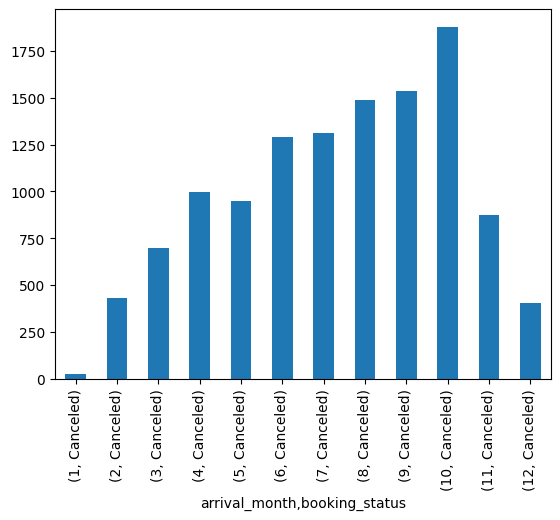

In [9]:
#let's see the booking status trough the months of the year
#mask cancellation
cancelled = df[df['booking_status'] == 'Canceled']
cancelled .groupby('arrival_month')['booking_status'].value_counts().plot(kind='bar')

<Axes: xlabel='arrival_month,booking_status'>

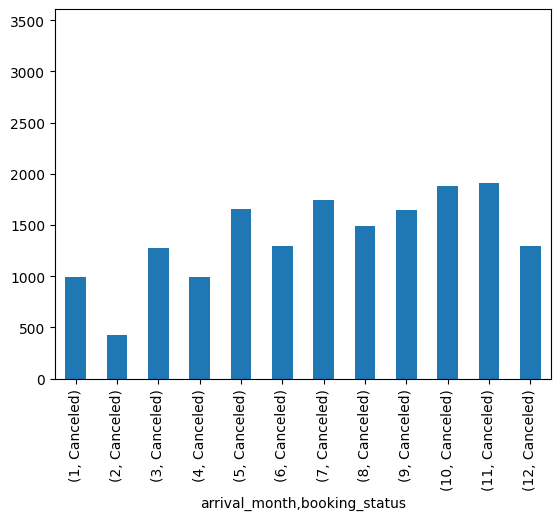

In [10]:
#let's count the booking reservations for each month, with the cancelations with one color and the total books with other color
df.groupby('arrival_month')['booking_status'].value_counts().plot(kind='bar',stacked=True)
#let's see the booking status trough the months of the year
#mask cancellation
cancelled = df[df['booking_status'] == 'Canceled']
cancelled .groupby('arrival_month')['booking_status'].value_counts().plot(kind='bar')


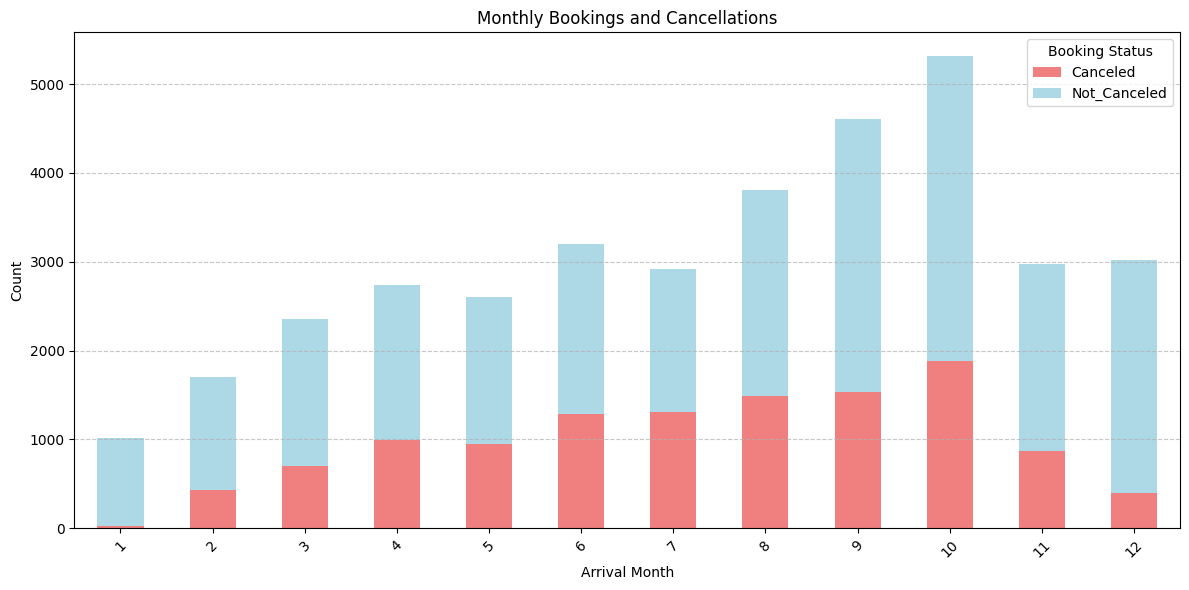

In [11]:
import matplotlib.pyplot as plt

# Pivot table to count booking statuses per month
monthly_data = df.pivot_table(index='arrival_month', columns='booking_status', aggfunc='size', fill_value=0)

# Plot the data
monthly_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightblue'])
plt.title('Monthly Bookings and Cancellations')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
#create a mask for cancelling
cancelled = df[df['booking_status'] == 'Canceled']
not_cancelled = df[df['booking_status'] == 'Not_Canceled']
cancelled.groupby('arrival_month')['booking_status'].value_counts()
not_cancelled.groupby('arrival_month')['booking_status'].value_counts().tolist()

not_cancelled = not_cancelled.groupby('arrival_month')['booking_status'].value_counts().tolist()
cancelled = cancelled.groupby('arrival_month')['booking_status'].value_counts().tolist()


total_list = []
for i in range(len(not_cancelled)):
    total_list.append(not_cancelled[i] + cancelled[i])

percentage = []
for i in range(len(not_cancelled)):
    percentage.append(cancelled[i]/total_list[i]*100)

worst_month = min(percentage)

In [14]:
print(percentage)


[2.366863905325444, 25.234741784037556, 29.686174724342663, 36.36695906432749, 36.489607390300236, 40.30596315953793, 45.0, 39.02439024390244, 33.355020602906094, 35.35828474703781, 29.36241610738255, 13.306852035749753]


The worst month is 7 with 45.00% cancellations.


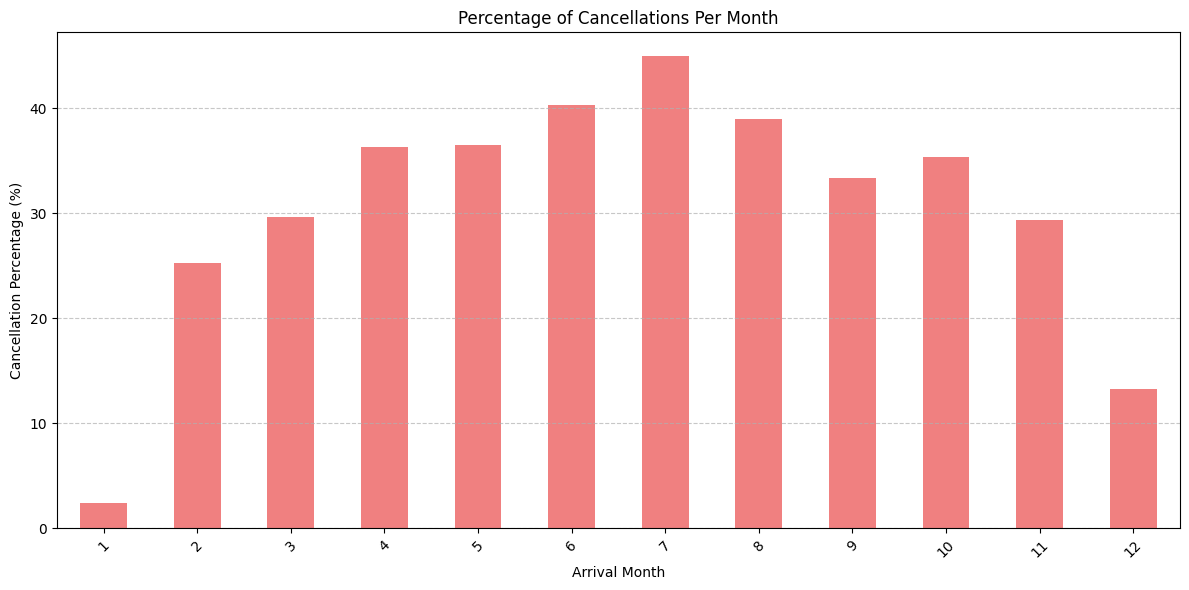

In [15]:
import matplotlib.pyplot as plt

# Total bookings and cancellations by month
total_bookings = df['arrival_month'].value_counts().sort_index()
cancelled_bookings = df[df['booking_status'] == 'Canceled']['arrival_month'].value_counts().sort_index()

# Calculate percentage of cancellations
percentage = (cancelled_bookings / total_bookings * 100).sort_index()

# Find the month with the highest cancellation percentage
worst_month_percentage = percentage.max()
worst_month = percentage.idxmax()

print(f"The worst month is {worst_month} with {worst_month_percentage:.2f}% cancellations.")

# Plot percentage cancellations
percentage.plot(kind='bar', figsize=(12, 6), color='lightcoral')
plt.title('Percentage of Cancellations Per Month')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# one hot encoding of the booking status
df = pd.get_dummies(df, columns=['booking_status'], drop_first=True)
# let's categorzie the

In [ ]:
full_data['rate_of_cancellations'] =  full_data['no_of_previous_cancellations']/(full_data['no_of_previous_cancellations'] + full_data['no_of_previous_bookings_not_canceled'])
full_data['rate_of_cancellations'] =  full_data['no_of_previous_cancellations']/(full_data['no_of_previous_cancellations'] + full_data['no_of_previous_bookings_not_canceled']).fillna(0)
full_data['total_people'] =  full_data['no_of_children'] + full_data['no_of_adults']
full_data['total_nights'] =  full_data['no_of_week_nights'] + full_data['no_of_week_nights']
full_data['includes_weekend'] = [1 if x > 0 else 0 for x in full_data['no_of_week_nights']]

In [17]:
!pip install aequitas

In [32]:
#let's see the correlations matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

ValueError: could not convert string to float: 'INN00001'

In [ ]:
#let's train an xgBoost model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

model = XGBClassifier()
#let's do greed search to finde the best result
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.